In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# Data preprocessing

In [4]:
train['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [5]:
print(sum(train.duplicated()))
print(sum(test.duplicated()))


0
0


In [6]:
print(train.isnull().values.sum())
print(test.isnull().values.sum())


0
0


checking for imbalance data

In [7]:
type(train.Activity.value_counts)

method

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LAYING'),
  Text(1, 0, 'STANDING'),
  Text(2, 0, 'SITTING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_UPSTAIRS'),
  Text(5, 0, 'WALKING_DOWNSTAIRS')])

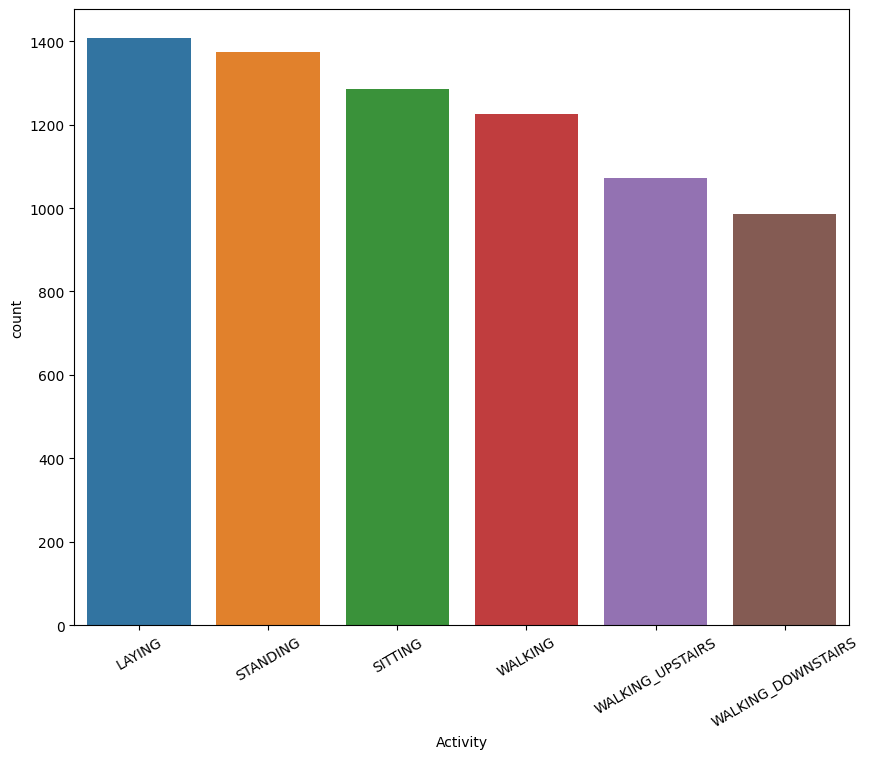

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x=train["Activity"],order= train["Activity"].value_counts().index)    # here data is almost balance
plt.xticks(rotation=30)


# EDA

what features are there

In [9]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
"tBodyAcc-mean()-X".split('-')[0]

'tBodyAcc'

In [11]:
"tBodyAcc-mad()-Z".split('-')[0].split('(')[0]

'tBodyAcc'

In [12]:
[col.split('-')[0].split('(')[0] for col in train.columns]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [13]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [14]:
# Counter return the no. of parameter in the feature mean tBodyAcc has 40 values like tBodyAcc-mean()-X, tBodyAcc-mean()-Y ..... like 40 values

In [15]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient="index").rename(columns={0:'count'}).sort_values('count',ascending=False)
#from_dict print this type as index

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [16]:
# analyzing tBodyAccMag-mean feature

Text(0.1, 9, 'dynamic Activities')

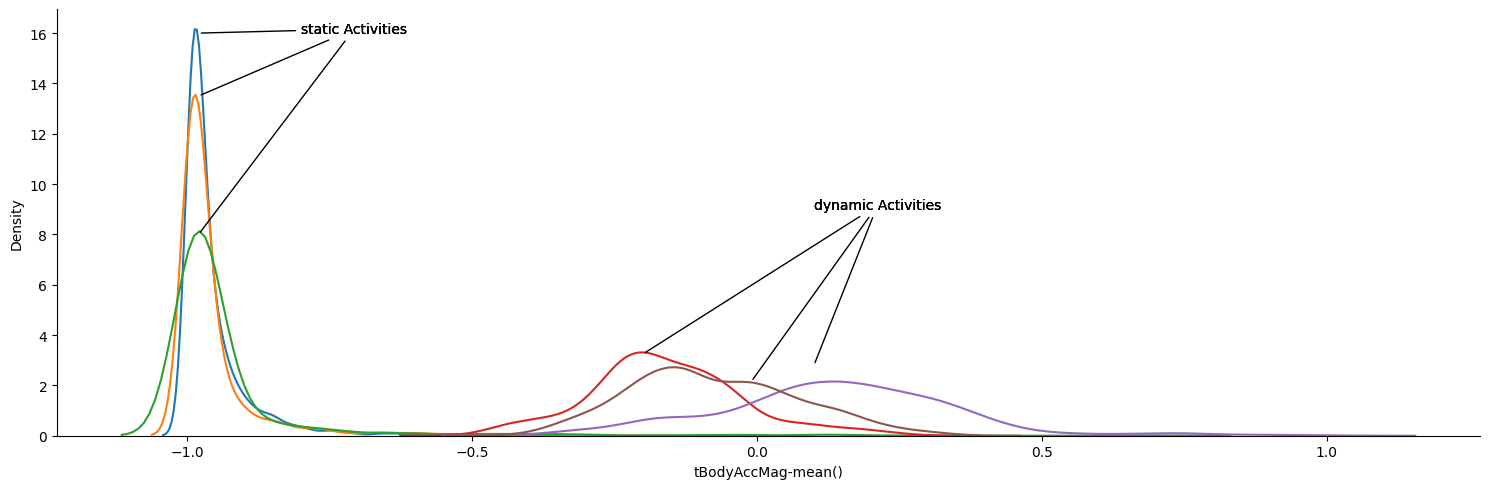

In [17]:
sns.FacetGrid(train, hue='Activity',height= 5,aspect=3).map(sns.distplot,'tBodyAccMag-mean()',hist=False)
plt.annotate("static Activities",xy=(-.98,8),xytext=(-.8,16),arrowprops={'arrowstyle':'-'})
plt.annotate("static Activities",xy=(-.98,13.5),xytext=(-.8,16),arrowprops={'arrowstyle':'-'})
plt.annotate("static Activities",xy=(-.98,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-'})

plt.annotate("dynamic Activities",xy=(-0.2,3.25),xytext=(0.1,9),arrowprops={'arrowstyle':'-'})
plt.annotate("dynamic Activities",xy=(0.1,2.8),xytext=(0.1,9),arrowprops={'arrowstyle':'-'})
plt.annotate("dynamic Activities",xy=(-0.01,2.15),xytext=(0.1,9),arrowprops={'arrowstyle':'-'})

here we did this because we want to find which parameters are inmportant like standing ,lying ,sitting

In [18]:
# aspect= Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

# 1st 3 are static activities(blue,green,orange)

In [19]:
# we have to put map() so that it will display the image

In [20]:
#FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.


Text(0, 0.5, 'body accelaration magnitude mean')

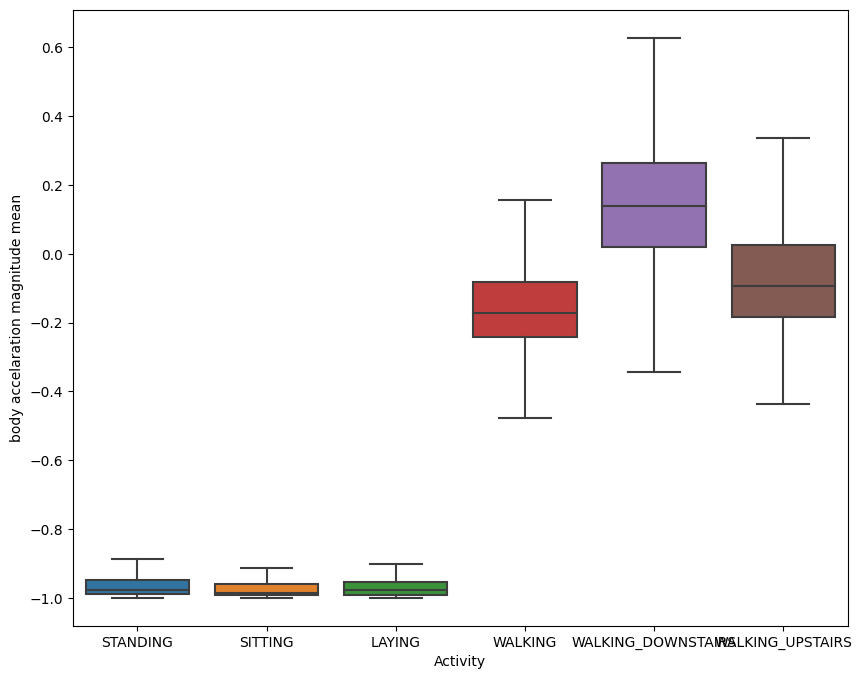

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Activity',y='tBodyAccMag-mean()',data=train,showfliers= False)  #showfliers removes outliers
plt.ylabel("body accelaration magnitude mean")

analyzing X- axis and gravity mean feature

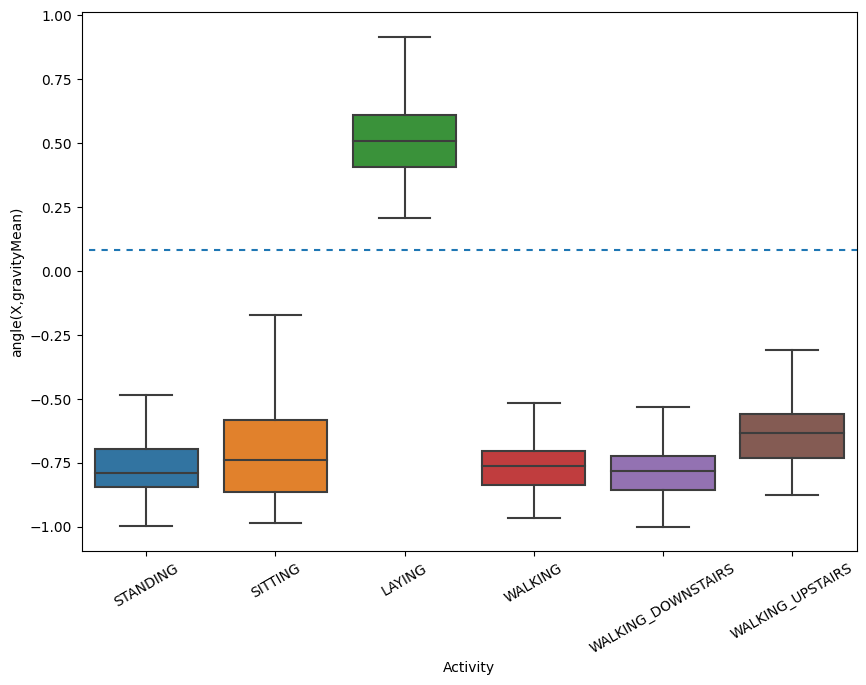

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(X,gravityMean)',data=train,showfliers= False)  #showfliers removes outliers
plt.xticks(rotation=30)
plt.axhline(y=0.08,xmin=0.01,dashes=(3,3))

In [23]:
# here you can see that laying is different from others because ,when you are laying it s perpendicular to gravity while others
#are 0 degree 

analyzing y axis and gravity mean feature

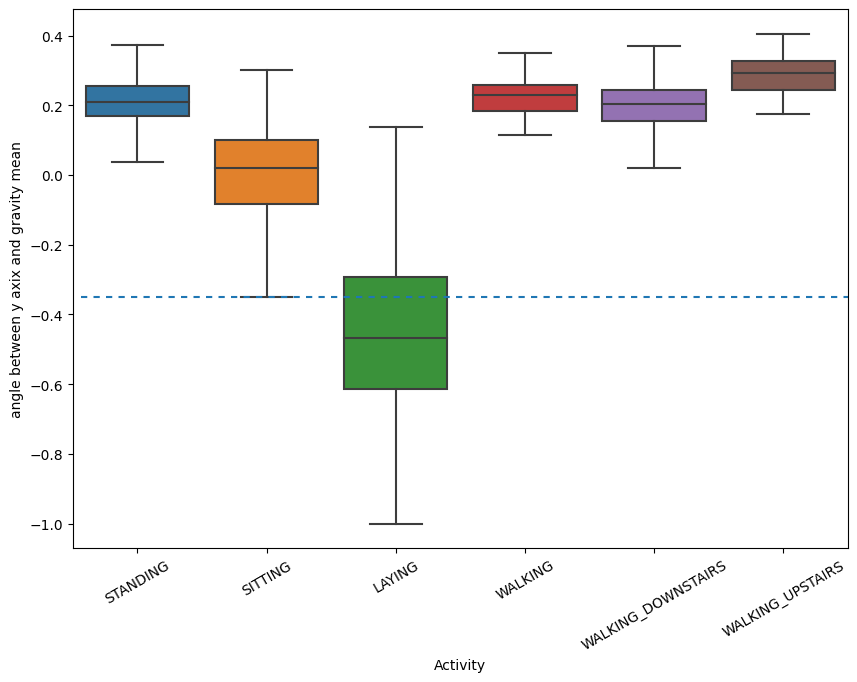

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data=train,showfliers= False)  #showfliers removes outliers
plt.ylabel('angle between y axix and gravity mean')
plt.xticks(rotation=30)
plt.axhline(y=-0.35,xmin=0.01,dashes=(3,3))

In [25]:
# the reason behind this is we need to find out the useful parameters.so that you can go on to the entire projects,and training 
# only those parameters

# PCA

In [26]:
x_for_pca= train.drop(['subject','Activity'],axis=1)
pca= PCA(n_components=2,random_state=32).fit_transform(x_for_pca)

In [27]:
pca

array([[-5.5202803 , -0.29027818],
       [-5.53534954, -0.0825304 ],
       [-5.47498801,  0.28738682],
       ...,
       [ 5.85750527, -3.08184367],
       [ 5.42109482, -3.42643011],
       [ 5.49797027, -2.78992826]])

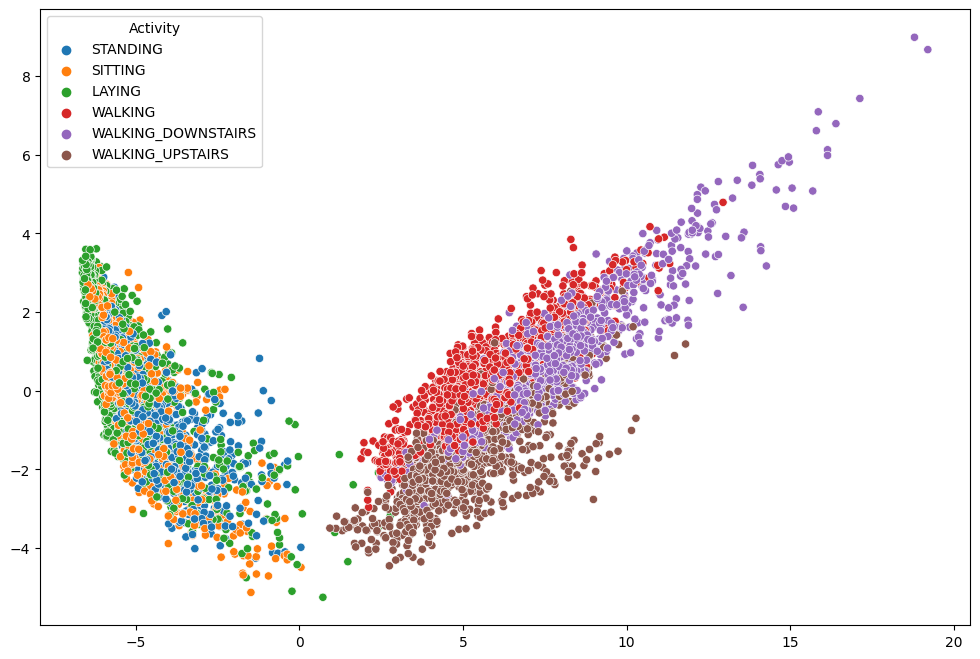

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0],y=pca[:, 1], hue= train['Activity'])
plt.show()

# TSNE

In [29]:
# sometimes tsne perform better than pca ,here in visualization you can see that it sepparate the laying position

In [30]:
x_for_tsne= train.drop(['subject','Activity'],axis=1)
tsne= TSNE(n_components=2,random_state=32,n_iter = 1000).fit_transform(x_for_tsne)

In [31]:
tsne

array([[ -6.177446, -62.815678],
       [-25.425976, -17.142431],
       [-27.112146, -20.221668],
       ...,
       [ 23.726963, -60.236797],
       [ 23.719082, -59.982132],
       [ 24.22815 , -59.21349 ]], dtype=float32)

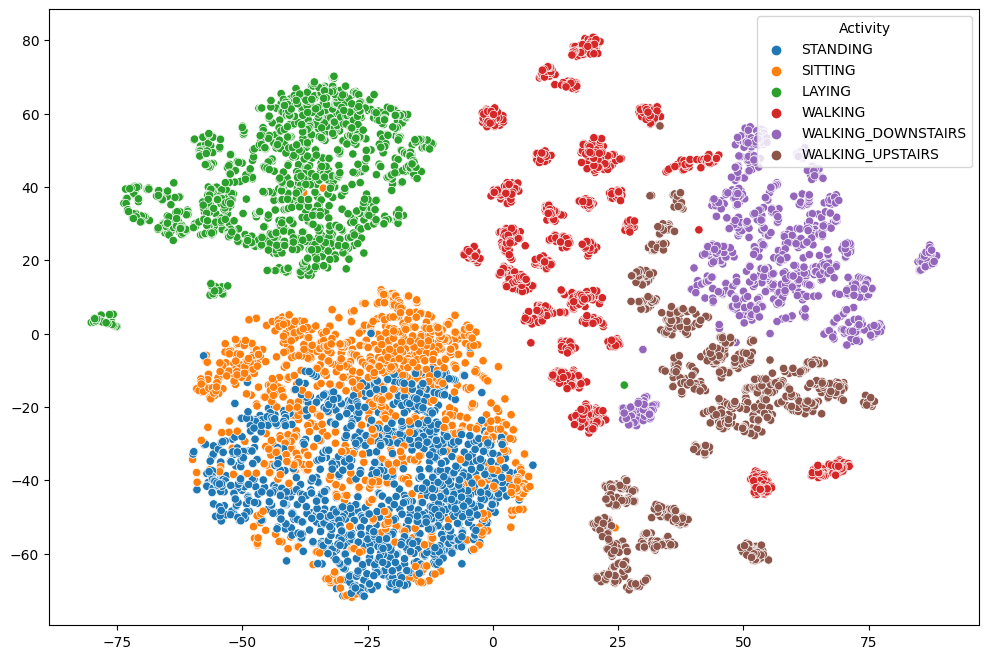

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:, 1], hue= train['Activity'])
plt.show()

this is all about the EDA i.e plot and best parameter finding

# ML Model

In [33]:
X_train= train.drop(['subject','Activity'],axis=1)
y_train= train.Activity

X_test= test.drop(['subject','Activity'],axis=1)
y_test= test.Activity


In [34]:
X_train.shape

(7352, 561)

In [43]:
parameters={'max_iter':[100,200,500]}
lr=LogisticRegression()
lr_rs=RandomizedSearchCV(lr,cv=5,param_distributions =parameters)
lr_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]})

In [44]:
y_pred= lr_rs.predict(X_test)

In [46]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.954954954954955

In [47]:
cm= confusion_matrix(y_test,y_pred)

In [48]:
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [50]:
lr_rs.best_params_

{'max_iter': 500}

# SVM

In [51]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,50]
}
svm_rs=RandomizedSearchCV(SVC(),cv=3,param_distributions =parameters,random_state=43)
svm_rs.fit(X_train,y_train)


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=43)

In [52]:
y_pred=svm_rs.predict(X_test)

In [55]:
accuracy= accuracy_score(y_test,y_pred)
accuracy

0.965965965965966

In [53]:
cm= confusion_matrix(y_test,y_pred)

In [63]:
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   7, 171,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]], dtype=int64)

In [73]:
def plot_confusion_matrix(cm,labels):
    fig,ax=plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im= ax.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1])),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels,
    yticklabels=labels,
    ylabel='true label'
    plt.xticks(rotation=90),
    thresh= cm.max()/ 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha='center',va='center',color='white' if cm[i,j]> thresh else 'black')
        fig.tight_layout()    
        
 

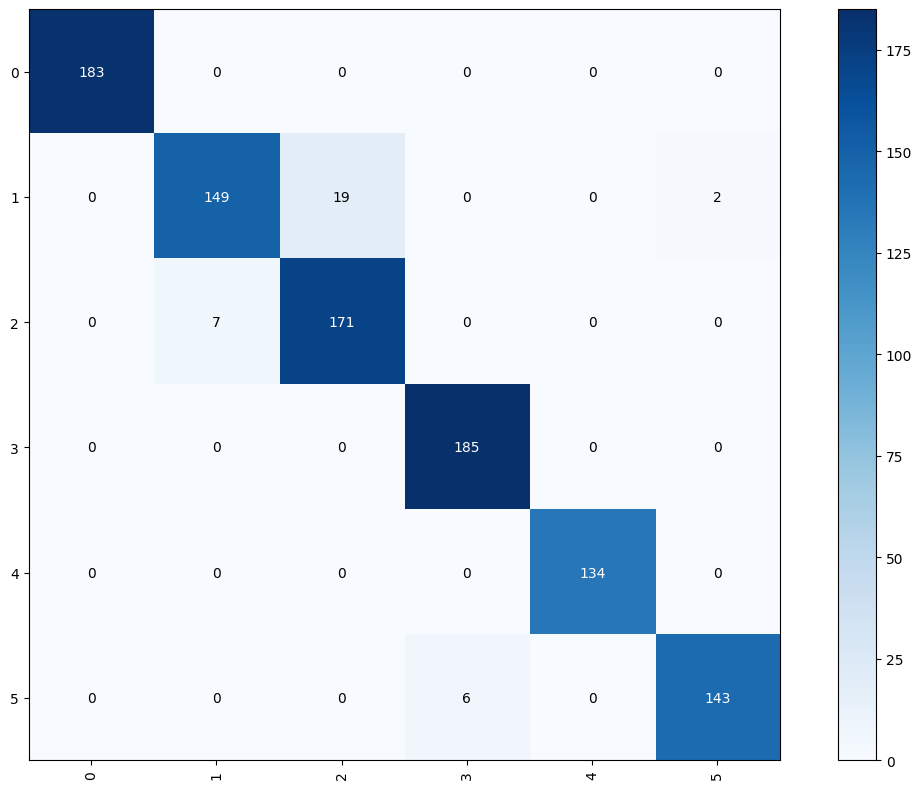

In [74]:
plot_confusion_matrix(cm,np.unique(y_pred))

In [68]:
np.unique(y_pred)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)